<a href="https://colab.research.google.com/github/NamWoo/004_Udacity_DataScientist_Nanodegree_2nd/blob/master/project_survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What Is The Difference Between ***World*** and ***South Korea*** Stackoverflow Users in 2019

This year, nearly 90,000 developers told us how they learn and level up, which tools they’re using, and what they want.

## Write a Data Science Blog Post

This project "Write a Data Science Blog Post" is part of Udacity Data Scientists Nanodegree Program about 2nd semester. 
* [Github repository](https://github.com/NamWoo/004_Udacity_DataScientist_Nanodegree_2nd)
* [Jupyter Notebook](https://github.com/NamWoo/004_Udacity_DataScientist_Nanodegree_2nd/blob/master/project_survey.ipynb)
* MY Github : https://github.com/NamWoo/

## The Goal of a Project

The motivation behind the project is to study and understand the Data and write blog

* ***How much difference does it make?***
* ***What preparations should I make about my career?***



### Ref
* https://www.kaggle.com/carlossouza/comparing-kaggle-and-stackoverflow-communities
* https://seaborn.pydata.org/examples/distplot_options.html
* https://insights.stackoverflow.com/survey/2019
* https://insights.stackoverflow.com/survey
* https://classroom.udacity.com/nanodegrees/nd025/parts/5c671264-6d88-412d-bb3a-0c2e07a8b915/modules/fcbd01aa-a9f5-4218-b559-1dfbf7dbafe9/lessons/93967fc6-1c57-407a-888e-2a8e676eb994/concepts/d0f0c9ed-424d-4360-aa59-811b52c54304
* https://medium.com/@AbdulazizKTA/write-a-data-science-blog-post-f8c5e1ece761
* https://www.one-tab.com/page/LOk6bUFfQuCF2EIAEGeNhQ

# Data preparation

I want to work anytime, anywhere, so use Google Drive.


## Google Drive Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import os

path = './drive/My Drive/02 MOOC/!2020_Project/developer_survey_2019'

# !ls './drive/My Drive'
# os.listdir(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import libraries

In [2]:
!pip install squarify
!pip install pycountry

import matplotlib.pyplot as plt
import squarify
import matplotlib
import pycountry
import seaborn as sns
import numpy as np
import pandas as pd
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected=True)  
from plotly.tools import FigureFactory as ff
import random
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load Data

In [0]:
df_public_path = os.path.join(path, 'survey_results_public.csv')
df_schema_path = os.path.join(path, 'survey_results_schema.csv')

df_public = pd.read_csv(df_public_path,encoding="utf-8")
df_schema = pd.read_csv(df_schema_path, encoding="utf-8")

### Before diving into the analysis lets see what are the questions asked in the survey

In [4]:
pd.options.display.max_colwidth = 300
df_schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order of survey response time)
1,MainBranch,"Which of the following options best describes you today? Here, by ""developer"" we mean ""someone who writes code."""
2,Hobbyist,Do you code as a hobby?
3,OpenSourcer,How often do you contribute to open source?
4,OpenSource,How do you feel about the quality of open source software (OSS)?
...,...,...
80,Sexuality,"Which of the following do you currently identify as? Please select all that apply. If you prefer not to answer, you may leave this question blank."
81,Ethnicity,"Which of the following do you identify as? Please check all that apply. If you prefer not to answer, you may leave this question blank."
82,Dependents,"Do you have any dependents (e.g., children, elders, or others) that you care for?"
83,SurveyLength,How do you feel about the length of the survey this year?


# Data Undertstanding

### Let's see the first five columns

In [5]:
df_public.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software is about the same,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or tool without taking a formal course",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a job board","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Courses on technologies you're interested in,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software is about the same,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,Taken an online course in programming or software development (e.g. a MOOC),NaN,"Developer, desktop or enterprise applications;Developer, front-end",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,"Financial performance or funding status of the company or organization;Specific department or team I'd be working on;Languages, frameworks, and other technologies I'd be working with","Something else changed (education, award, media, etc.)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change many aspects of our lives,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how to do things I didn’t necessarily look for,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board but have never used or visited it","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Industry news about technologies you're interested in;Tech meetups or events in your area;Courses on technologies you're interested in,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,Never,The quality of OSS and closed source software is about the same,Employed f

## Category Country 

In [6]:
df_public.Country.unique()

array(['United Kingdom', 'Bosnia and Herzegovina', 'Thailand',
       'United States', 'Ukraine', 'Canada', 'India', 'New Zealand',
       'Antigua and Barbuda', 'Germany', 'Australia',
       'Russian Federation', 'Brazil', 'Lithuania', 'Israel',
       'South Africa', 'Colombia', 'Turkey', 'Switzerland', 'Argentina',
       'Sri Lanka', 'Czech Republic', 'Denmark', 'Malaysia', 'Bangladesh',
       'Spain', 'Serbia', 'Poland', 'Sweden', 'China', 'France',
       'Netherlands', 'Italy', 'Philippines', 'Ireland', 'Pakistan',
       'Azerbaijan', 'Austria', 'Estonia', 'Croatia', 'South Korea',
       'Greece', 'Japan', 'Romania', 'Finland', 'Bulgaria', 'Viet Nam',
       'Slovenia', 'Iran', 'Belarus', 'Hungary', 'Latvia',
       'Hong Kong (S.A.R.)', 'United Arab Emirates', 'Portugal',
       'Nigeria', 'Norway', 'Nicaragua', 'Zimbabwe', 'Egypt', 'Mexico',
       'Dominican Republic', 'Guatemala', 'Chile', 'Ecuador', 'Ghana',
       'Uganda', 'Cambodia', 'Mauritius', 'Nepal', 'Singapore'

In [7]:
country_soflow = df_public.groupby('Country').Country.count()
country_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=country_soflow.index)
country_soflow_df['numeric'] = country_soflow
country_soflow_df['perc'] = country_soflow_df['numeric'] / country_soflow_df['numeric'].sum()
country_soflow_df.sort_values(by=['numeric'], ascending=False, inplace=True)
country_soflow_df.rename({'Russian Federation': 'Russia'}, inplace=True)
country_soflow_df

,numeric,perc
Country,,
United States,20949,0.236042
India,9061,0.102095
Germany,5866,0.066095
United Kingdom,5737,0.064642
Canada,3395,0.038253
...,...,...
North Korea,1,0.000011
Niger,1,0.000011
Saint Vincent and the Grenadines,1,0.000011


In [8]:
list2 = country_soflow_df[:25].index.values.tolist()
union = [e for e in list2]

country = pd.DataFrame(columns=['soflow_num'], index=union)
for c in union:
    country.loc[c] = [country_soflow_df['numeric'].loc[c]]
    
country['Stack Overflow'] = country['soflow_num'] / country_soflow_df['numeric'].sum()
country.drop(columns=['soflow_num'], inplace=True)
country = country[:20]
country

,Stack Overflow
United States,0.236042
India,0.102095
Germany,0.066095
United Kingdom,0.0646415
Canada,0.0382531
France,0.0269405
Brazil,0.021949
Poland,0.0216561
Australia,0.021442
Netherlands,0.0208674


In [0]:
def autolabel(rects, xpos='center', fontsize='medium'):
    xpos = xpos.lower()  # normalize the case of the parameter
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}  # x_txt = x + w*off

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{0:.1f}'.format(height * 100), ha=ha[xpos], va='bottom', fontsize=fontsize)

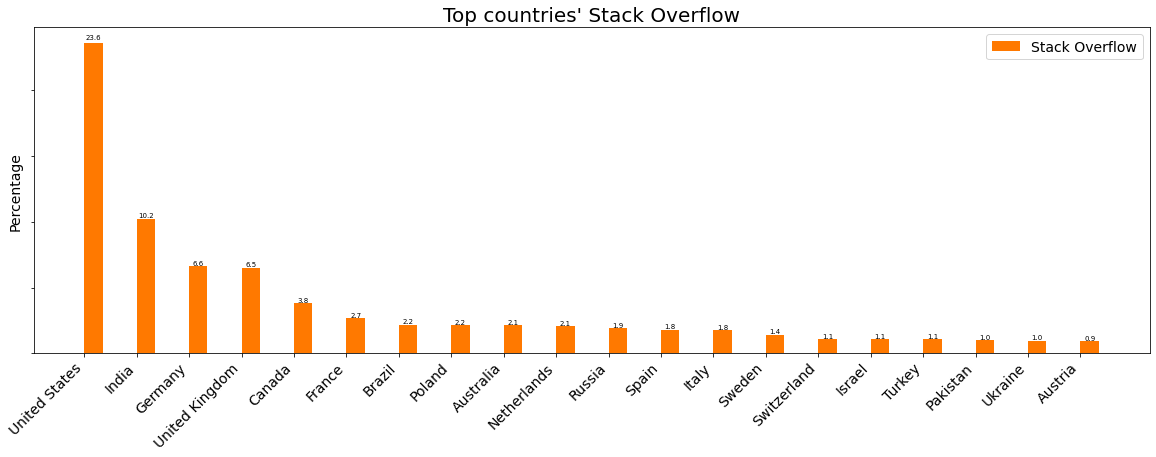

In [10]:
plt.rcParams["figure.figsize"] = [20, 6]
ind = np.arange(country.shape[0])  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects2 = ax.bar(ind + width/2, country['Stack Overflow'], width, yerr=None, color='#FF7900', label='Stack Overflow')
ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Top countries\' Stack Overflow', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(country.index, fontsize=14, rotation = 45, ha="right")
ax.legend(fontsize=14)
#ax.set_ylim([0,0.6])
ax.set_yticklabels([])

autolabel(rects2, fontsize='x-small')

plt.show()

### About South Korea

`Republic of Korea` and `South Korea` are the same. so I changed it.

* from `Republic of Korea` to `South Korea`


In [11]:
print((df_public.Country == 'Republic of Korea').sum())
print((df_public.Country == 'South Korea').sum())

39
160


In [12]:
# df_public['Republic of Korea']
df_public.loc[df_public.Country == 'Republic of Korea','Country',] = 'South Korea'
print((df_public.Country == 'Republic of Korea').sum())
print((df_public.Country == 'South Korea').sum())

0
199


And then I started painting again.

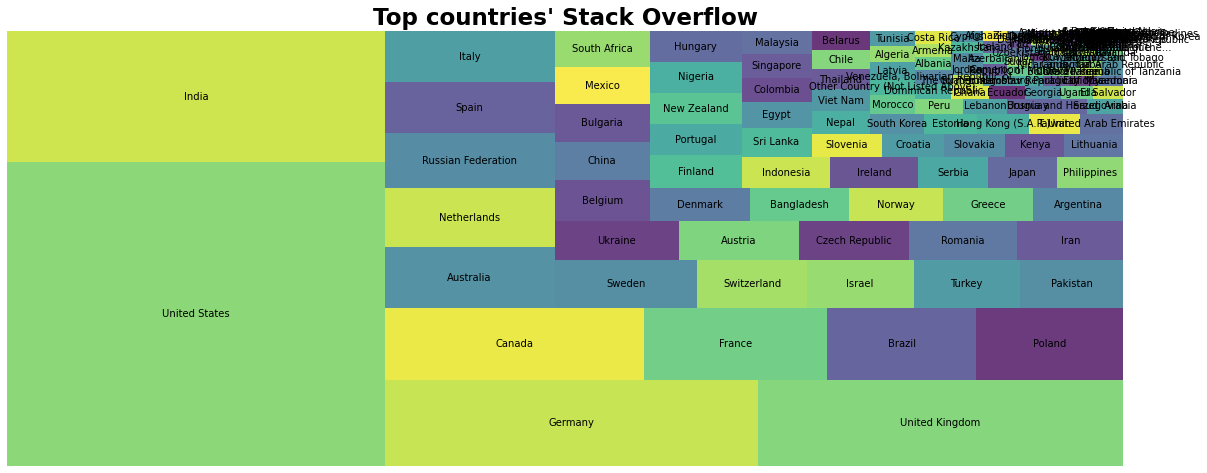

In [13]:
squarify.plot(sizes=df_public['Country'].value_counts().values, label=df_public['Country'].value_counts().index, alpha=.8 )
plt.title("Top countries\' Stack Overflow",fontsize=23,fontweight="bold")
plt.axis('off')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)

plt.show()

Remove countries with fewer respondents.

In [14]:
print(df_public['Country'].value_counts()[df_public['Country'].value_counts() > 100].shape)

country_sizes = df_public['Country'].value_counts()[df_public['Country'].value_counts() > 100].values
country_label = df_public['Country'].value_counts()[df_public['Country'].value_counts() > 100].index

(72,)


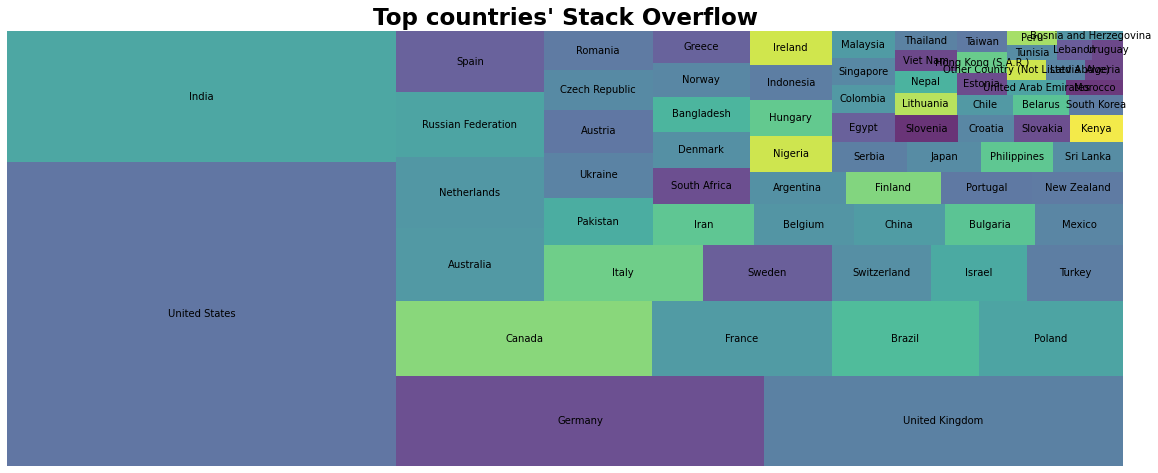

In [15]:
squarify.plot(sizes=country_sizes, label=country_label, alpha=.8 )
plt.title("Top countries\' Stack Overflow",fontsize=23,fontweight="bold")
plt.axis('off')

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20, 8)

plt.show()

---

## Divide data into `World` and `South Korea`.

In [16]:
print(df_public.shape)

df_kr = df_public.loc[df_public.Country == 'South Korea',]
print(df_kr.shape)

df_without_kr = df_public[df_public.Country != 'South Korea']
print(df_without_kr.shape)

(88883, 85)
(199, 85)
(88684, 85)


---

# Data Analysis

## How is gender diversity different?


In [17]:
gender_kr = df_kr.groupby('Gender').Gender.count()
gender_kr_df = pd.DataFrame(columns=['numeric', 'perc'], index=gender_kr.index)
gender_kr_df['numeric'] = gender_kr
gender_kr_df['perc'] = gender_kr_df['numeric'] / gender_kr_df['numeric'].sum()
gender_kr_df

,numeric,perc
Gender,,
Man,167,0.897849
Woman,17,0.091398
Woman;Man,2,0.010753


In [18]:
gender_soflow = df_public.groupby('Gender').Gender.count()
gender_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=gender_soflow.index)
gender_soflow_df['numeric'] = gender_soflow
gender_soflow_df['perc'] = gender_soflow_df['numeric'] / gender_soflow_df['numeric'].sum()
gender_soflow_df

,numeric,perc
Gender,,
Man,77919,0.912336
"Man;Non-binary, genderqueer, or gender non-conforming",181,0.002119
"Non-binary, genderqueer, or gender non-conforming",597,0.006990
Woman,6344,0.074280
Woman;Man,132,0.001546
"Woman;Man;Non-binary, genderqueer, or gender non-conforming",70,0.000820
"Woman;Non-binary, genderqueer, or gender non-conforming",163,0.001909


In [19]:
# gender_soflow_df
gender = pd.DataFrame(columns=['soflow_num', 'kr_num'], index=['Man', 'Woman', 'Others'])
for g in ['Man', 'Woman']:
    gender.loc[g] = [gender_soflow_df['numeric'].loc[g], gender_kr_df['numeric'].loc[g]]

gender['soflow_num'].loc['Others'] = gender_soflow_df['numeric'].sum() - gender['soflow_num'].sum()
gender['kr_num'].loc['Others'] = gender_kr_df['numeric'].sum() - gender['kr_num'].sum()

gender['Stack Overflow'] = gender['soflow_num'] / gender['soflow_num'].sum()
gender['South Korea'] = gender['kr_num'] / gender['kr_num'].sum()
gender.drop(columns=['soflow_num', 'kr_num'], inplace=True)
gender

,Stack Overflow,South Korea
Man,0.912336,0.897849
Woman,0.0742805,0.0913978
Others,0.0133831,0.0107527


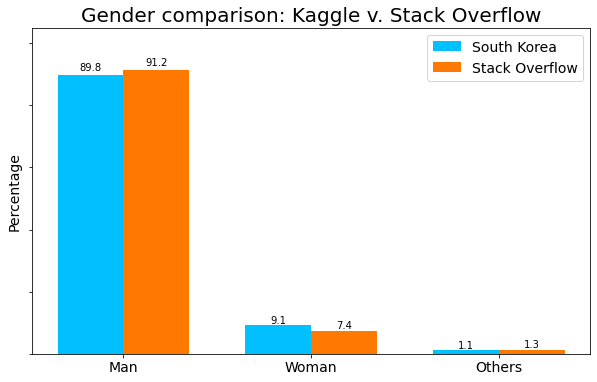

In [20]:
plt.rcParams["figure.figsize"] = [10, 6]
ind = np.arange(gender.shape[0])  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, gender['South Korea'], width, yerr=None, color='#00C0FF', label='South Korea')
rects2 = ax.bar(ind + width/2, gender['Stack Overflow'], width, yerr=None, color='#FF7900', label='Stack Overflow')
ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Gender comparison: Kaggle v. Stack Overflow', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(gender.index, fontsize=14)
ax.legend(fontsize=14)
ax.set_ylim([0,1.05])
ax.set_yticklabels([])

      
autolabel(rects1)
autolabel(rects2)

plt.show()

Proportionally, there are almost the same!

## How does age compare?

I checked if I was too young, too old, or wrong.
* 15 ~ 70
* 18 ~ 70 (I drew it based on this.)



In [21]:
df_public.loc[(df_public['Age'] > 15.) & (df_public['Age'] < 70.),].Age.unique()

# df_public.groupby('Age').Age.count()

array([19. , 28. , 22. , 30. , 42. , 24. , 23. , 21. , 31. , 20. , 26. ,
       29. , 38. , 47. , 34. , 32. , 25. , 17. , 35. , 27. , 44. , 43. ,
       62. , 37. , 45. , 18. , 33. , 36. , 16. , 39. , 64. , 41. , 54. ,
       49. , 40. , 56. , 58. , 46. , 59. , 51. , 48. , 57. , 52. , 50. ,
       23.9, 55. , 67. , 53. , 69. , 65. , 17.5, 63. , 61. , 68. , 60. ,
       16.5, 46.5, 29.5, 26.5, 26.3, 24.5, 66. , 36.8, 19.5, 43.5, 22.5,
       31.5, 21.5, 28.5, 33.6, 38.5, 30.8, 24.8, 61.3, 17.3, 19.9, 23.5,
       16.9, 20.9, 57.9, 37.5, 37.3, 33.5, 53.8, 31.4])

In [22]:
print(df_public.loc[(df_public['Age'] > 15.) & (df_public['Age'] < 70.),].shape)
print(df_public.shape)

(78125, 85)
(88883, 85)


In [23]:
age_soflow = df_public.groupby('Age').Age.count()
age_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=age_soflow.index)
age_soflow_df['numeric'] = age_soflow
age_soflow_df['perc'] = age_soflow_df['numeric'] / age_soflow_df['numeric'].sum()
age_soflow_df

,numeric,perc
Age,,
1.0,18,0.000227
2.0,8,0.000101
3.0,3,0.000038
4.0,1,0.000013
5.0,3,0.000038
...,...,...
95.0,2,0.000025
97.0,1,0.000013
98.0,3,0.000038


In [24]:
age_soflow = df_without_kr.groupby('Age').Age.count()
age_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=age_soflow.index)
age_soflow_df['numeric'] = age_soflow
age_soflow_df['perc'] = age_soflow_df['numeric'] / age_soflow_df['numeric'].sum()
age_soflow_df

,numeric,perc
Age,,
1.0,18,0.000228
2.0,8,0.000101
3.0,3,0.000038
4.0,1,0.000013
5.0,3,0.000038
...,...,...
95.0,1,0.000013
97.0,1,0.000013
98.0,3,0.000038


In [25]:
age_kr = df_kr.groupby('Age').Age.count()
age_kr_df = pd.DataFrame(columns=['numeric', 'perc'], index=age_kr.index)
age_kr_df['numeric'] = age_kr
age_kr_df['perc'] = age_kr_df['numeric'] / age_kr_df['numeric'].sum()
age_kr_df

,numeric,perc
Age,,
13.0,1,0.006061
14.0,3,0.018182
15.0,2,0.012121
16.0,2,0.012121
17.0,1,0.006061
18.0,2,0.012121
19.0,5,0.030303
20.0,7,0.042424
21.0,7,0.042424


In [0]:
plt.rcParams["figure.figsize"] = [10, 6]
ind = np.arange(df_public.Age.shape[0])
width = 0.35

draw a graph

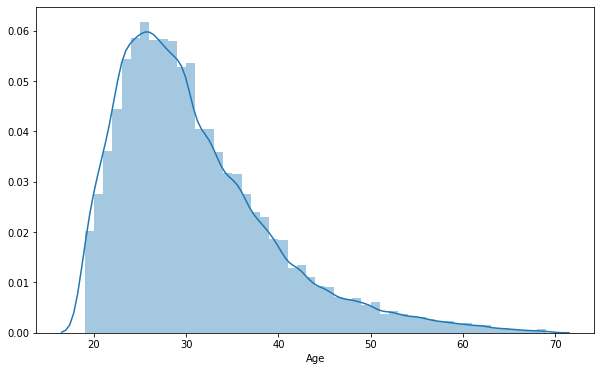

In [27]:
sns.distplot(df_without_kr.loc[(df_without_kr['Age'] > 18.) & (df_without_kr['Age'] < 70.),].Age)

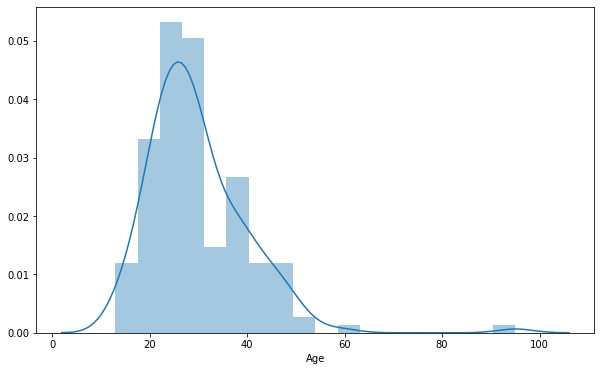

In [28]:
sns.distplot(df_kr.Age)

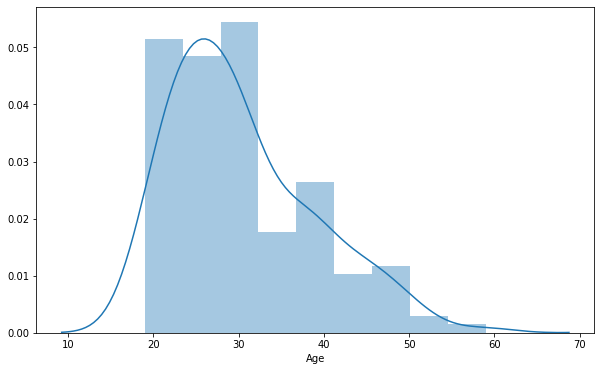

In [29]:
sns.distplot(df_kr.loc[(df_public['Age'] > 18.) & (df_kr['Age'] < 70.),].Age)

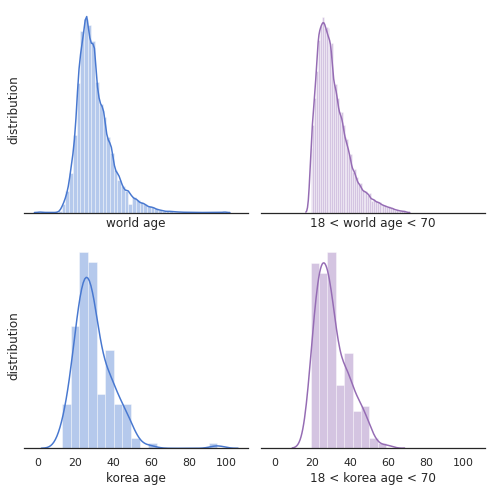

In [30]:
sns.set(style="white", palette="muted", color_codes=True)
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)
# .set(title = 'lalala', xlabel = 'its x_label', ylabel = 'its y_label' )
sns.distplot(df_without_kr.Age, ax=axes[0, 0]).set(xlabel = 'world age', ylabel= 'distribution')
sns.distplot(df_without_kr.loc[(df_without_kr['Age'] > 18.) & (df_without_kr['Age'] < 70.),].Age, color="m", ax=axes[0, 1]).set(xlabel = '18 < world age < 70')

sns.distplot(df_kr.Age, ax=axes[1, 0]).set(xlabel = 'korea age', ylabel= 'distribution')
sns.distplot(df_kr.loc[(df_public['Age'] > 18.) & (df_kr['Age'] < 70.),].Age, color="m", ax=axes[1, 1]).set(xlabel = '18 < korea age < 70')

plt.setp(axes, yticks=[])
plt.tight_layout()

There was no big difference between the two Stackoverflow users.

## How does education compare?

In [0]:
# df_public.columns
# EdLevel	UndergradMajor	EduOther

In [32]:
education_soflow = df_without_kr.groupby('EdLevel').EdLevel.count()
education_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=education_soflow.index)
education_soflow_df['numeric'] = education_soflow
education_soflow_df['perc'] = education_soflow_df['numeric'] / education_soflow_df['numeric'].sum()
education_soflow_df.sort_values(by=['numeric'], ascending=False, inplace=True)
education_soflow_df.rename({'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree', 
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
                            'Some college/university study without earning a degree': 'Some college/university study without earning a bachelor’s degree',
                            'Professional degree (JD, MD, etc.)': 'Professional degree',
                            'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                            'I never completed any formal education': 'No formal education past high school'
                           }, inplace=True)

education_soflow_df.loc['Bachelor’s degree'] = education_soflow_df.loc['Bachelor’s degree'] + education_soflow_df.loc['Associate degree']
education_soflow_df.loc['No formal education past high school'] = education_soflow_df.loc['No formal education past high school'] + education_soflow_df.loc['Primary/elementary school'] + education_soflow_df.loc['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']
education_soflow_df.drop(index=['Associate degree', 'Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'], inplace=True)

education_soflow_df

,numeric,perc
EdLevel,,
Bachelor’s degree,41975.0,0.486960
Master’s degree,19539.0,0.226676
Some college/university study without earning a bachelor’s degree,10485.0,0.121639
Doctoral degree,2424.0,0.028121
Professional degree,1196.0,0.013875
No formal education past high school,10579.0,0.122729


In [33]:
education_kr = df_kr.groupby('EdLevel').EdLevel.count()
education_kr_df = pd.DataFrame(columns=['numeric', 'perc'], index=education_kr.index)
education_kr_df['numeric'] = education_kr
education_kr_df['perc'] = education_kr_df['numeric'] / education_kr_df['numeric'].sum()
education_kr_df.sort_values(by=['numeric'], ascending=False, inplace=True)
education_kr_df.rename({'Bachelor’s degree (BA, BS, B.Eng., etc.)': 'Bachelor’s degree', 
                            'Master’s degree (MA, MS, M.Eng., MBA, etc.)': 'Master’s degree',
                            'Some college/university study without earning a degree': 'Some college/university study without earning a bachelor’s degree',
                            'Professional degree (JD, MD, etc.)': 'Professional degree',
                            'Other doctoral degree (Ph.D, Ed.D., etc.)': 'Doctoral degree',
                            'I never completed any formal education': 'No formal education past high school'
                           }, inplace=True)

education_kr_df.loc['Bachelor’s degree'] = education_kr_df.loc['Bachelor’s degree'] + education_kr_df.loc['Associate degree']
education_kr_df.loc['No formal education past high school'] = education_kr_df.loc['No formal education past high school'] + education_kr_df.loc['Primary/elementary school'] + education_kr_df.loc['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)']
education_kr_df.drop(index=['Associate degree', 'Primary/elementary school', 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'], inplace=True)

education_kr_df

,numeric,perc
EdLevel,,
Bachelor’s degree,97.0,0.505208
Master’s degree,30.0,0.156250
Some college/university study without earning a bachelor’s degree,17.0,0.088542
Doctoral degree,8.0,0.041667
Professional degree,2.0,0.010417
No formal education past high school,38.0,0.197917


In [34]:
education = pd.DataFrame(columns=['soflow_num', 'kr_num'], index=education_soflow_df.index)
for e in education.index:
    education.loc[e] = [education_soflow_df['numeric'].loc[e], education_kr_df['numeric'].loc[e]]
    
education['South Korea'] = education['kr_num'] / education_kr_df['numeric'].sum()
education['Stack Overflow'] = education['soflow_num'] / education_soflow_df['numeric'].sum()
education.drop(columns=['soflow_num', 'kr_num'], inplace=True)
education

,South Korea,Stack Overflow
EdLevel,,
Bachelor’s degree,0.505208,0.48696
Master’s degree,0.15625,0.226676
Some college/university study without earning a bachelor’s degree,0.0885417,0.121639
Doctoral degree,0.0416667,0.0281213
Professional degree,0.0104167,0.013875
No formal education past high school,0.197917,0.122729


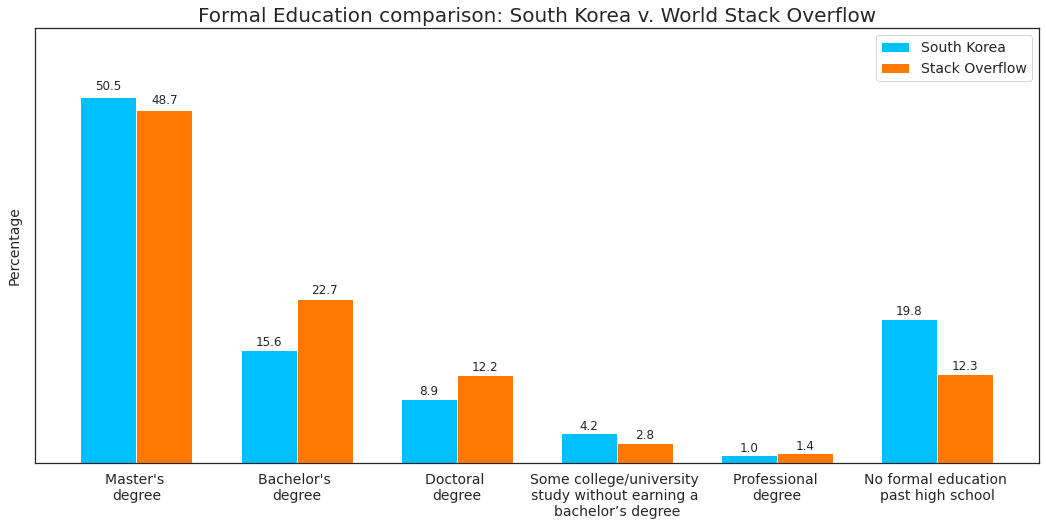

In [35]:
plt.rcParams["figure.figsize"] = [18, 8]
ind = np.arange(education.shape[0])  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, education['South Korea'], width, yerr=None, color='#00C0FF', label='South Korea')
rects2 = ax.bar(ind + width/2, education['Stack Overflow'], width, yerr=None, color='#FF7900', label='Stack Overflow')
ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Formal Education comparison: South Korea v. World Stack Overflow', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(['Master\'s \ndegree', 
                    'Bachelor\'s \ndegree', 
                    'Doctoral \ndegree', 
                    'Some college/university \nstudy without earning a \nbachelor’s degree', 
                    'Professional \ndegree', 
                    'No formal education \npast high school'], fontsize=14, rotation = 0, ha="center")
ax.legend(fontsize=14)
ax.set_ylim([0,0.6])
ax.set_yticklabels([])

autolabel(rects1)
autolabel(rects2)

plt.show()

In Korea, there were far more `master's degrees` than `bachelor's degrees`.

And I can see a large number of `Doctoral degrees` in the world.


## How does undegrad major compare?


In [36]:
undergrad_soflow = df_without_kr.groupby('UndergradMajor').UndergradMajor.count()
undergrad_soflow_df = pd.DataFrame(columns=['numeric', 'perc'], index=undergrad_soflow.index)
undergrad_soflow_df['numeric'] = undergrad_soflow
undergrad_soflow_df['perc'] = undergrad_soflow_df['numeric'] / undergrad_soflow_df['numeric'].sum()

undergrad_soflow_df.rename({'Computer science, computer engineering, or software engineering': 'Computer science (software engineering, etc.)', 
                            'Another engineering discipline (ex. civil, electrical, mechanical)': 'Engineering (non-computer focused)',
                            'Information systems, information technology, or system administration': 'Information technology, networking, or system administration',
                            'A natural science (ex. biology, chemistry, physics)': 'Medical or natural sciences (ex. biology, chemistry, physics, astronomy)',
                            'A business discipline (ex. accounting, finance, marketing)': 'A business discipline (accounting, economics, finance, etc.)',
                            'A humanities discipline (ex. literature, history, philosophy)': 'Humanities (history, literature, philosophy, etc.)',
                            'A social science (ex. anthropology, psychology, political science)': 'Social sciences (anthropology, psychology, sociology, etc.)',
                            'Fine arts or performing arts (ex. graphic design, music, studio art)': 'Fine arts or performing arts',
                            'Web development or web design': 'Other'
                           }, inplace=True)

undergrad_soflow_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] = undergrad_soflow_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] + undergrad_soflow_df.loc['A health science (ex. nursing, pharmacy, radiology)']
undergrad_soflow_df.drop(index=['A health science (ex. nursing, pharmacy, radiology)'], inplace=True)
undergrad_soflow_df.sort_values(by=['numeric'], ascending=False, inplace=True)

undergrad_soflow_df

,numeric,perc
UndergradMajor,,
"Computer science (software engineering, etc.)",47123.0,0.624468
Engineering (non-computer focused),6210.0,0.082294
"Information technology, networking, or system administration",5242.0,0.069466
"Medical or natural sciences (ex. biology, chemistry, physics, astronomy)",3551.0,0.047057
Other,3416.0,0.045268
Mathematics or statistics,2966.0,0.039305
"A business discipline (accounting, economics, finance, etc.)",1835.0,0.024317
"Humanities (history, literature, philosophy, etc.)",1567.0,0.020766
"Social sciences (anthropology, psychology, sociology, etc.)",1348.0,0.017864


In [37]:
df_kr.groupby('UndergradMajor').UndergradMajor.count()

UndergradMajor
A business discipline (ex. accounting, finance, marketing)                6
A humanities discipline (ex. literature, history, philosophy)             4
A natural science (ex. biology, chemistry, physics)                       4
A social science (ex. anthropology, psychology, political science)        4
Another engineering discipline (ex. civil, electrical, mechanical)       12
Computer science, computer engineering, or software engineering          91
Fine arts or performing arts (ex. graphic design, music, studio art)      3
I never declared a major                                                  3
Information systems, information technology, or system administration    11
Mathematics or statistics                                                 9
Web development or web design                                             6
Name: UndergradMajor, dtype: int64

In [38]:
undergrad_kr = df_kr.groupby('UndergradMajor').UndergradMajor.count()
undergrad_kr_df = pd.DataFrame(columns=['numeric', 'perc'], index=undergrad_kr.index)
undergrad_kr_df['numeric'] = undergrad_kr
undergrad_kr_df['perc'] = undergrad_kr_df['numeric'] / undergrad_kr_df['numeric'].sum()

undergrad_kr_df.rename({'Computer science, computer engineering, or software engineering': 'Computer science (software engineering, etc.)', 
                            'Another engineering discipline (ex. civil, electrical, mechanical)': 'Engineering (non-computer focused)',
                            'Information systems, information technology, or system administration': 'Information technology, networking, or system administration',
                            'A natural science (ex. biology, chemistry, physics)': 'Medical or natural sciences (ex. biology, chemistry, physics, astronomy)',
                            'A business discipline (ex. accounting, finance, marketing)': 'A business discipline (accounting, economics, finance, etc.)',
                            'A humanities discipline (ex. literature, history, philosophy)': 'Humanities (history, literature, philosophy, etc.)',
                            'A social science (ex. anthropology, psychology, political science)': 'Social sciences (anthropology, psychology, sociology, etc.)',
                            'Fine arts or performing arts (ex. graphic design, music, studio art)': 'Fine arts or performing arts',
                            'Web development or web design': 'Other'
                           }, inplace=True)

undergrad_kr_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] = undergrad_kr_df.loc['Medical or natural sciences (ex. biology, chemistry, physics, astronomy)'] #+ undergrad_kr_df.loc['A health science (ex. nursing, pharmacy, radiology)']
# undergrad_kr_df.drop(index=['A health science (ex. nursing, pharmacy, radiology)'], inplace=True)
undergrad_kr_df.sort_values(by=['numeric'], ascending=False, inplace=True)

undergrad_kr_df

,numeric,perc
UndergradMajor,,
"Computer science (software engineering, etc.)",91.0,0.594771
Engineering (non-computer focused),12.0,0.078431
"Information technology, networking, or system administration",11.0,0.071895
Mathematics or statistics,9.0,0.058824
"A business discipline (accounting, economics, finance, etc.)",6.0,0.039216
Other,6.0,0.039216
"Humanities (history, literature, philosophy, etc.)",4.0,0.026144
"Medical or natural sciences (ex. biology, chemistry, physics, astronomy)",4.0,0.026144
"Social sciences (anthropology, psychology, sociology, etc.)",4.0,0.026144


In [39]:
undergrad = pd.DataFrame(columns=['soflow_num', 'kr_num'], index=undergrad_soflow_df.index)
for e in undergrad.index:
    undergrad.loc[e] = [undergrad_soflow_df['numeric'].loc[e], undergrad_kr_df['numeric'].loc[e]]
    
undergrad['Stack Overflow'] = undergrad['soflow_num'] / undergrad_soflow_df['numeric'].sum()
undergrad['South Korea'] = undergrad['kr_num'] / undergrad_kr_df['numeric'].sum()
undergrad.drop(columns=['soflow_num', 'kr_num'], inplace=True)
undergrad

,Stack Overflow,South Korea
UndergradMajor,,
"Computer science (software engineering, etc.)",0.624468,0.594771
Engineering (non-computer focused),0.0822942,0.0784314
"Information technology, networking, or system administration",0.0694663,0.0718954
"Medical or natural sciences (ex. biology, chemistry, physics, astronomy)",0.0470574,0.0261438
Other,0.0452684,0.0392157
Mathematics or statistics,0.0393051,0.0588235
"A business discipline (accounting, economics, finance, etc.)",0.0243172,0.0392157
"Humanities (history, literature, philosophy, etc.)",0.0207657,0.0261438
"Social sciences (anthropology, psychology, sociology, etc.)",0.0178635,0.0261438


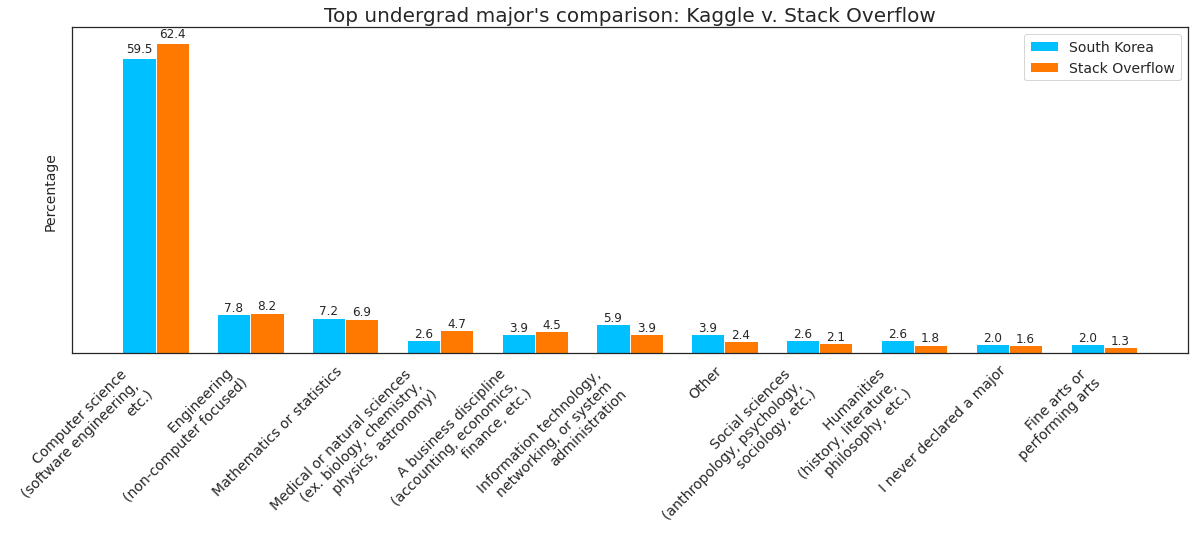

In [40]:
plt.rcParams["figure.figsize"] = [20, 6]
ind = np.arange(undergrad.shape[0])  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, undergrad['South Korea'], width, yerr=None, color='#00C0FF', label='South Korea')
rects2 = ax.bar(ind + width/2, undergrad['Stack Overflow'], width, yerr=None, color='#FF7900', label='Stack Overflow')
ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Top undergrad major\'s comparison: Kaggle v. Stack Overflow', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(['Computer science \n(software engineering, \netc.)',
                    'Engineering \n(non-computer focused)', 'Mathematics or statistics',
                    'Medical or natural sciences \n(ex. biology, chemistry, \nphysics, astronomy)',
                    'A business discipline \n(accounting, economics, \nfinance, etc.)',
                    'Information technology, \nnetworking, or system \nadministration', 'Other',
                    'Social sciences \n(anthropology, psychology, \nsociology, etc.)',
                    'Humanities \n(history, literature, \nphilosophy, etc.)',
                    'I never declared a major', 'Fine arts or \nperforming arts'], fontsize=14, rotation = 45, ha="right")
ax.legend(fontsize=14)
#ax.set_ylim([0,0.6])
ax.set_yticklabels([])

autolabel(rects1) #, fontsize='x-small')
autolabel(rects2) #, fontsize='x-small')

plt.show()

There were many computer majors in the world.

In Korea, there were more medical or natural majors.

## How does compensation compare?


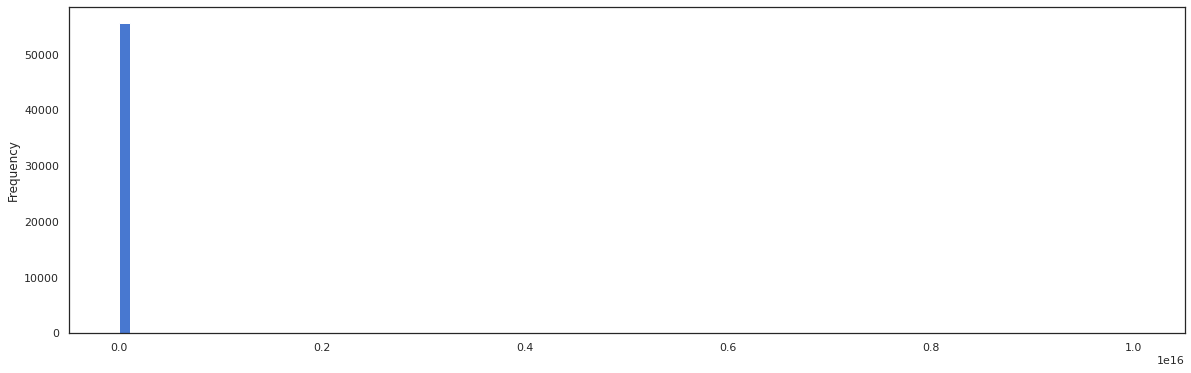

In [41]:
df_without_kr['CompTotal'].fillna(0, inplace=True)
compensation_soflow_df = df_without_kr[df_without_kr['CompTotal'] > 0].CompTotal.reset_index(drop=True)
plt.figure();
compensation_soflow_df.plot(kind='hist', bins=100) #.hist()

In [42]:
compensation_kr_df = df_kr[df_kr['CompTotal'] > 0].CompTotal.reset_index(drop=True)
compensation_kr_df

0      42000000.0
1       8000000.0
2      33000000.0
3      40000000.0
4      45000000.0
         ...     
81      2985823.0
82     30000000.0
83      1200000.0
84     26000000.0
85    120000000.0
Name: CompTotal, Length: 86, dtype: float64

In [43]:
x = compensation_soflow_df
compensation_soflow_df_2 = pd.DataFrame(columns=['numeric', 'perc'], index=['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', '300,000+'])
compensation_soflow_df_2.loc['0-10,000'] = x[x <= 10000].count()
compensation_soflow_df_2.loc['10-20,000'] = x[(x > 10000) & (x <= 20000)].count()
compensation_soflow_df_2.loc['20-30,000'] = x[(x > 20000) & (x <= 30000)].count()
compensation_soflow_df_2.loc['30-40,000'] = x[(x > 30000) & (x <= 40000)].count()
compensation_soflow_df_2.loc['40-50,000'] = x[(x > 40000) & (x <= 50000)].count()
compensation_soflow_df_2.loc['50-60,000'] = x[(x > 50000) & (x <= 60000)].count()
compensation_soflow_df_2.loc['60-70,000'] = x[(x > 60000) & (x <= 70000)].count()
compensation_soflow_df_2.loc['70-80,000'] = x[(x > 70000) & (x <= 80000)].count()
compensation_soflow_df_2.loc['80-90,000'] = x[(x > 80000) & (x <= 90000)].count()
compensation_soflow_df_2.loc['90-100,000'] = x[(x > 90000) & (x <= 100000)].count()
compensation_soflow_df_2.loc['100-125,000'] = x[(x > 100000) & (x <= 125000)].count()
compensation_soflow_df_2.loc['125-150,000'] = x[(x > 125000) & (x <= 150000)].count()
compensation_soflow_df_2.loc['150-200,000'] = x[(x > 150000) & (x <= 200000)].count()
compensation_soflow_df_2.loc['200-250,000'] = x[(x > 200000) & (x <= 250000)].count()
compensation_soflow_df_2.loc['250-300,000'] = x[(x > 250000) & (x <= 300000)].count()
compensation_soflow_df_2.loc['300,000+'] = x[x > 300000].count()
compensation_soflow_df_2['perc'] = compensation_soflow_df_2['numeric'] / compensation_soflow_df_2['numeric'].sum()
compensation_soflow_df_2

,numeric,perc
"0-10,000",11617,0.208493
"10-20,000",2579,0.0462858
"20-30,000",2741,0.0491933
"30-40,000",3539,0.0635151
"40-50,000",3702,0.0664405
"50-60,000",3506,0.0629229
"60-70,000",3049,0.054721
"70-80,000",3038,0.0545236
"80-90,000",2429,0.0435937
"90-100,000",2537,0.045532


In [44]:
x = compensation_kr_df
compensation_kr_df_2 = pd.DataFrame(columns=['numeric', 'perc'], index=['0-10,000', '10-20,000', '20-30,000', '30-40,000', '40-50,000', '50-60,000', '60-70,000', '70-80,000', '80-90,000', '90-100,000', '100-125,000', '125-150,000', '150-200,000', '200-250,000', '250-300,000', '300,000+'])
compensation_kr_df_2.loc['0-10,000'] = x[x <= 10000].count()
compensation_kr_df_2.loc['10-20,000'] = x[(x > 10000) & (x <= 20000)].count() + x[(x > 10000000) & (x <= 20000000)].count() 
compensation_kr_df_2.loc['20-30,000'] = x[(x > 20000) & (x <= 30000)].count() + x[(x > 20000000) & (x <= 30000000)].count() 
compensation_kr_df_2.loc['30-40,000'] = x[(x > 30000) & (x <= 40000)].count() + x[(x > 30000000) & (x <= 40000000)].count() 
compensation_kr_df_2.loc['40-50,000'] = x[(x > 40000) & (x <= 50000)].count() + x[(x > 40000000) & (x <= 50000000)].count() 
compensation_kr_df_2.loc['50-60,000'] = x[(x > 50000) & (x <= 60000)].count() + x[(x > 50000000) & (x <= 60000000)].count() 
compensation_kr_df_2.loc['60-70,000'] = x[(x > 60000) & (x <= 70000)].count() + x[(x > 60000000) & (x <= 70000000)].count() 
compensation_kr_df_2.loc['70-80,000'] = x[(x > 70000) & (x <= 80000)].count() + x[(x > 70000000) & (x <= 80000000)].count() 
compensation_kr_df_2.loc['80-90,000'] = x[(x > 80000) & (x <= 90000)].count() + x[(x > 80000000) & (x <= 90000000)].count() 
compensation_kr_df_2.loc['90-100,000'] = x[(x > 90000) & (x <= 100000)].count() + x[(x > 90000000) & (x <= 100000000)].count() 
compensation_kr_df_2.loc['100-125,000'] = x[(x > 100000) & (x <= 125000)].count() + x[(x > 100000000) & (x <= 125000000)].count() 
compensation_kr_df_2.loc['125-150,000'] = x[(x > 125000) & (x <= 150000)].count() + x[(x > 1250000000) & (x <= 150000000)].count() 
compensation_kr_df_2.loc['150-200,000'] = x[(x > 150000) & (x <= 200000)].count() + x[(x > 150000000) & (x <= 200000000)].count() 
compensation_kr_df_2.loc['200-250,000'] = x[(x > 200000) & (x <= 250000)].count() + x[(x > 200000000) & (x <= 250000000)].count() 
compensation_kr_df_2.loc['250-300,000'] = x[(x > 250000) & (x <= 300000)].count() + x[(x > 250000000) & (x <= 300000000)].count() 
compensation_kr_df_2.loc['300,000+'] = x[x > 300000000].count()
compensation_kr_df_2['perc'] = compensation_kr_df_2['numeric'] / compensation_kr_df_2['numeric'].sum()
compensation_kr_df_2

,numeric,perc
"0-10,000",3,0.0447761
"10-20,000",1,0.0149254
"20-30,000",8,0.119403
"30-40,000",13,0.19403
"40-50,000",16,0.238806
"50-60,000",11,0.164179
"60-70,000",7,0.104478
"70-80,000",2,0.0298507
"80-90,000",1,0.0149254
"90-100,000",2,0.0298507


In [45]:
compensation = pd.DataFrame(columns=['soflow_num', 'kr_num'], index=compensation_soflow_df_2.index)
for c in compensation.index:
    compensation.loc[c] = [compensation_soflow_df_2['numeric'].loc[c], compensation_kr_df_2['numeric'].loc[c]]
    
compensation['South Korea'] = compensation['kr_num'] / compensation_kr_df_2['numeric'].sum()
compensation['Stack Overflow'] = compensation['soflow_num'] / compensation_soflow_df_2['numeric'].sum()
compensation.drop(columns=['soflow_num'], inplace=True)
compensation

,kr_num,South Korea,Stack Overflow
"0-10,000",3,0.0447761,0.208493
"10-20,000",1,0.0149254,0.0462858
"20-30,000",8,0.119403,0.0491933
"30-40,000",13,0.19403,0.0635151
"40-50,000",16,0.238806,0.0664405
"50-60,000",11,0.164179,0.0629229
"60-70,000",7,0.104478,0.054721
"70-80,000",2,0.0298507,0.0545236
"80-90,000",1,0.0149254,0.0435937
"90-100,000",2,0.0298507,0.045532


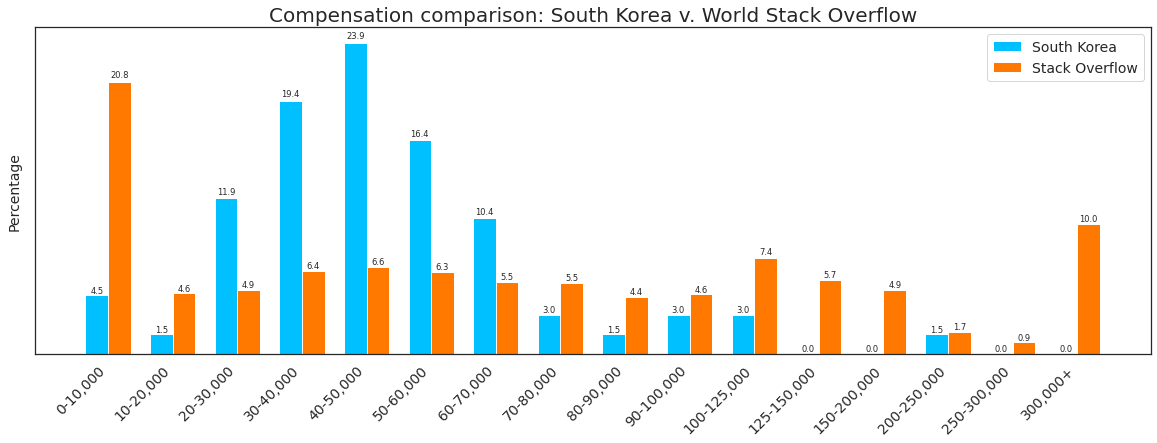

In [46]:
plt.rcParams["figure.figsize"] = [20, 6]
ind = np.arange(compensation.shape[0])  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, compensation['South Korea'], width, yerr=None, color='#00C0FF', label='South Korea')
rects2 = ax.bar(ind + width/2, compensation['Stack Overflow'], width, yerr=None, color='#FF7900', label='Stack Overflow')
ax.patch.set_visible(False)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage', fontsize=14)
ax.set_title('Compensation comparison: South Korea v. World Stack Overflow', fontsize=20)
ax.set_xticks(ind)
ax.set_xticklabels(compensation.index, fontsize=14, rotation = 45, ha="right")
ax.legend(fontsize=14)
#ax.set_ylim([0,0.6])
ax.set_yticklabels([])

autolabel(rects1, fontsize='x-small')
autolabel(rects2, fontsize='x-small')

plt.show()

I got it right by preprocessing. However, since the exchange rate is different and most people wrote it using Korean money or dollars! both!!. 

there was a big difference in data to analyze it in common with the world.

**So I tried to take the feeling that there was a certain distribution.**


Koreans' annual salary was based on `$40,000 - $60,000` per year.

The question is, how can people around the world get an annual salary of `$100,000?`

>***How can I make such an effort to get such a high salary like them?***

From now on, I should check the data of high-paying people a little


---